# Linear regression

## Using Normal Equation and SVD approaches.

In [1]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100, 1)

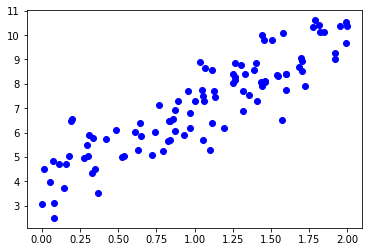

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, y, "bo")
plt.show()

In [3]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[3.96627942],
       [3.05207192]])

In [5]:

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.96627942],
       [10.07042326]])

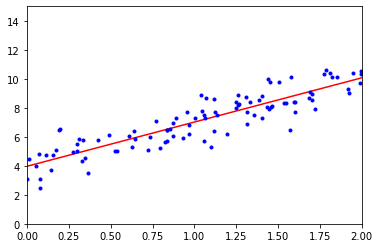

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()


In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[3.96627942] [[3.05207192]]
[[ 3.96627942]
 [10.07042326]]


In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.96627942],
       [3.05207192]])

In [9]:
np.linalg.pinv(X_b).dot(y)

array([[3.96627942],
       [3.05207192]])

# NE and SVD get very slow when the number of features grows lagre(100k)
# the O(n) of inverting matrix is about 2.4 ~ 3
# Looking other way to train LinearRegression, which is better suited when number of features are large

## --------------------------------
# Gradient Descent

## Batch GD

In [11]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

theta

array([[3.96627942],
       [3.05207192]])

## Stochastic GD

In [15]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)
thetas = []
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        thetas.append(theta)
        theta = theta - eta * gradients
    

theta

array([[3.99165172],
       [3.06275406]])

In [34]:

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

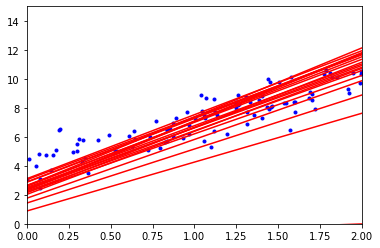

In [35]:
plt.plot(X, y, "b.")
for i in range(20):
    y_predict = X_new_b.dot(thetas[i])
    plt.plot(X_new, y_predict, "r-")
plt.axis([0, 2, 0, 15])
plt.show()

In [39]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [40]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.98489708]), array([3.12997194]))

## Polynomial Regression